## ESCUELA POLITECNICA NACIONAL
## [Taller 1b] Eliminación gaussiana vs Gauss-Jordan
# JHONN SAETEROS


[06-24 21:50:41][INFO] Inicio: 2025-06-24 21:50:41.975717
[06-24 21:50:41][INFO] Iniciando comparación de métodos...
[06-24 21:50:41][INFO] Gauss - Tiempo: 0.0000s, Operaciones: 1
[06-24 21:50:41][INFO] Jordan - Tiempo: 0.0020s, Operaciones: 2
[06-24 21:50:41][INFO] Completado n =   1 | Gauss: 0.0000s | Jordan: 0.0048s
[06-24 21:50:41][INFO] Gauss - Tiempo: 0.0024s, Operaciones: 226
[06-24 21:50:41][INFO] Jordan - Tiempo: 0.0015s, Operaciones: 297
[06-24 21:50:42][INFO] Completado n =   6 | Gauss: 0.0051s | Jordan: 0.0028s
[06-24 21:50:42][INFO] Gauss - Tiempo: 0.0032s, Operaciones: 1176
[06-24 21:50:42][INFO] Jordan - Tiempo: 0.0000s, Operaciones: 1617
[06-24 21:50:42][INFO] Completado n =  11 | Gauss: 0.0032s | Jordan: 0.0043s
[06-24 21:50:42][INFO] Gauss - Tiempo: 0.0025s, Operaciones: 3351
[06-24 21:50:42][INFO] Jordan - Tiempo: 0.0019s, Operaciones: 4712
[06-24 21:50:42][INFO] Completado n =  16 | Gauss: 0.0081s | Jordan: 0.0019s
[06-24 21:50:42][INFO] Gauss - Tiempo: 0.0038s, Ope

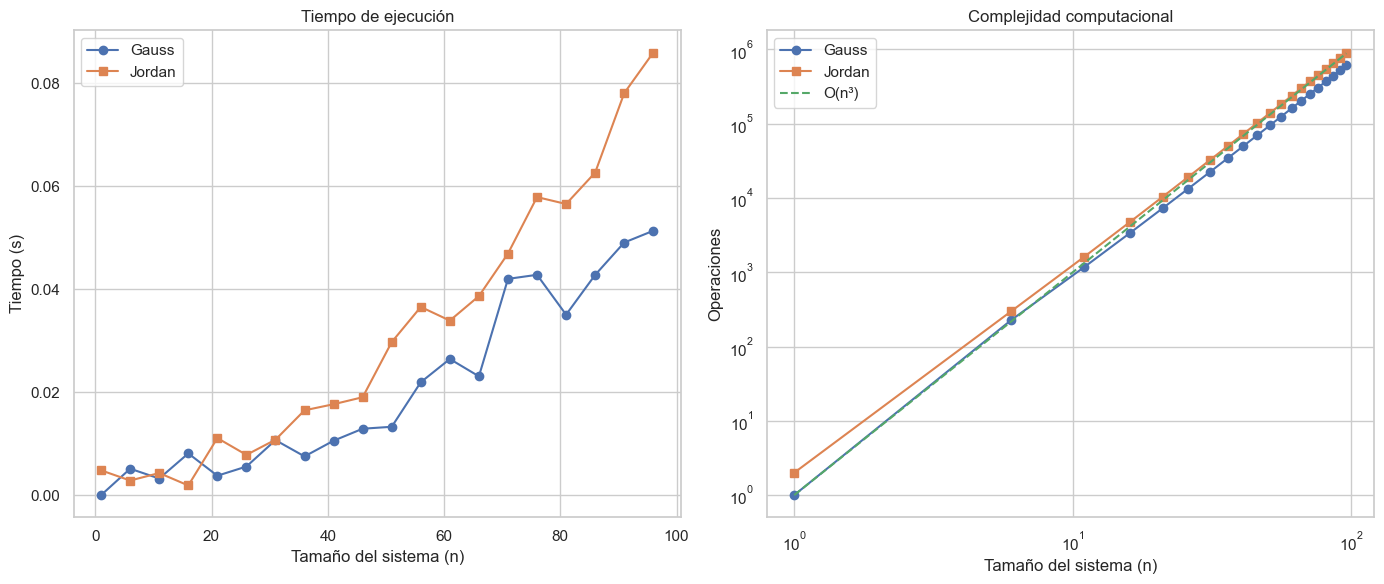

[06-24 21:50:46][INFO] Finalizado: 2025-06-24 21:50:46.246821


In [1]:
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from typing import Tuple
from sys import stdout
from datetime import datetime

# Configuración de logging
logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logger = logging.getLogger()
logger.info(f"Inicio: {datetime.now()}")

def matriz_aumentada(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Crea la matriz aumentada [A|b]."""
    return np.column_stack((A, b))

def eliminacion_gaussiana(A: np.ndarray) -> Tuple[np.ndarray, int]:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    Args:
        A: Matriz aumentada del sistema de ecuaciones lineales (n x n+1).

    Returns:
        Tuple[np.ndarray, int]: Solución del sistema y número de operaciones.
    """
    start_time = time.time()
    operaciones = 0
    if not isinstance(A, np.ndarray):
        logger.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    
    n = A.shape[0]
    assert A.shape[1] == n + 1, "La matriz debe ser de tamaño n x (n+1)."

    for i in range(n - 1):
        # Pivoteo parcial
        max_row = i + np.argmax(np.abs(A[i:, i]))
        if A[max_row, i] == 0:
            raise ValueError("No existe solución única.")
        if max_row != i:
            A[[i, max_row]] = A[[max_row, i]]
        
        # Eliminación
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            operaciones += 1  # división
            
            A[j, i:] -= m * A[i, i:]
            operaciones += 2 * (n + 1 - i)  # multiplicación y resta por elemento

    if A[n-1, n-1] == 0:
        raise ValueError("No existe solución única.")

    # Sustitución hacia atrás
    x = np.zeros(n)
    x[n-1] = A[n-1, n] / A[n-1, n-1]
    operaciones += 1

    for i in range(n-2, -1, -1):
        x[i] = (A[i, n] - np.dot(A[i, i+1:n], x[i+1:n])) / A[i, i]
        operaciones += 2 * (n - i)  # producto punto + división

    logger.info(f"Gauss - Tiempo: {time.time()-start_time:.4f}s, Operaciones: {operaciones}")
    return x, operaciones

def gauss_jordan(Ab: np.ndarray) -> Tuple[np.ndarray, int]:
    """Resuelve un sistema de ecuaciones lineales mediante el método de Gauss-Jordan.

    Args:
        Ab: Matriz aumentada del sistema (n x n+1).

    Returns:
        Tuple[np.ndarray, int]: Solución del sistema y número de operaciones.
    """
    start_time = time.time()
    operaciones = 0
    Ab = np.array(Ab, dtype=float)
    n = Ab.shape[0]
    assert Ab.shape[1] == n + 1, "La matriz debe ser de tamaño n x (n+1)."

    for i in range(n):
        # Pivoteo parcial
        max_row = i + np.argmax(np.abs(Ab[i:, i]))
        if Ab[max_row, i] == 0:
            raise ValueError("No existe solución única.")
        if max_row != i:
            Ab[[i, max_row]] = Ab[[max_row, i]]
        
        # Normalizar fila
        pivot = Ab[i, i]
        Ab[i] /= pivot
        operaciones += n + 1 - i  # divisiones
        
        # Eliminación en otras filas
        for j in range(n):
            if j != i:
                factor = Ab[j, i]
                Ab[j] -= factor * Ab[i]
                operaciones += 2 * (n + 1 - i)  # multiplicación y resta

    logger.info(f"Jordan - Tiempo: {time.time()-start_time:.4f}s, Operaciones: {operaciones}")
    return Ab[:, -1], operaciones

def comparar_metodos(n_max: int = 100, step: int = 5) -> Tuple[dict, dict]:
    """Compara los métodos de Eliminación Gaussiana y Gauss-Jordan para sistemas de tamaño 1 a n_max.
    
    Args:
        n_max: Tamaño máximo del sistema a probar.
        step: Incremento entre tamaños de sistemas.
        
    Returns:
        Tuple[dict, dict]: Resultados para Eliminación Gaussiana y Gauss-Jordan.
    """
    resultados_gauss = {'n': [], 'tiempo': [], 'operaciones': []}
    resultados_jordan = {'n': [], 'tiempo': [], 'operaciones': []}
    
    for n in range(1, n_max + 1, step):
        # Generar sistema aleatorio bien condicionado
        A = np.random.rand(n, n) + n * np.eye(n)  # Añadimos diagonal dominante
        b = np.random.rand(n)
        Ab = matriz_aumentada(A, b)
        
        try:
            # Eliminación Gaussiana
            start = time.time()
            _, ops = eliminacion_gaussiana(Ab.copy())
            resultados_gauss['n'].append(n)
            resultados_gauss['tiempo'].append(time.time() - start)
            resultados_gauss['operaciones'].append(ops)
            
            # Gauss-Jordan
            start = time.time()
            _, ops = gauss_jordan(Ab.copy())
            resultados_jordan['n'].append(n)
            resultados_jordan['tiempo'].append(time.time() - start)
            resultados_jordan['operaciones'].append(ops)
            
            logger.info(f"Completado n = {n:3d} | Gauss: {resultados_gauss['tiempo'][-1]:.4f}s | Jordan: {resultados_jordan['tiempo'][-1]:.4f}s")
        except Exception as e:
            logger.error(f"Error con n={n}: {str(e)}")
            break
    
    return resultados_gauss, resultados_jordan

def graficar_resultados(resultados_gauss: dict, resultados_jordan: dict):
    """Genera gráficos comparativos de los métodos."""
    plt.figure(figsize=(14, 6))
    sns.set_theme(style="whitegrid")
    
    # Gráfico de tiempos de ejecución
    plt.subplot(1, 2, 1)
    plt.plot(resultados_gauss['n'], resultados_gauss['tiempo'], 'o-', label='Gauss')
    plt.plot(resultados_jordan['n'], resultados_jordan['tiempo'], 's-', label='Jordan')
    plt.xlabel('Tamaño del sistema (n)')
    plt.ylabel('Tiempo (s)')
    plt.title('Tiempo de ejecución')
    plt.legend()
    plt.grid(True)
    
    # Gráfico de complejidad computacional
    plt.subplot(1, 2, 2)
    n_vals = np.array(resultados_gauss['n'])
    plt.loglog(resultados_gauss['n'], resultados_gauss['operaciones'], 'o-', label='Gauss')
    plt.loglog(resultados_jordan['n'], resultados_jordan['operaciones'], 's-', label='Jordan')
    plt.loglog(n_vals, n_vals**3, '--', label='O(n³)')
    plt.xlabel('Tamaño del sistema (n)')
    plt.ylabel('Operaciones')
    plt.title('Complejidad computacional')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Configurar para sistemas grandes
    np.random.seed(42)  # Para reproducibilidad
    
    logger.info("Iniciando comparación de métodos...")
    resultados_gauss, resultados_jordan = comparar_metodos(n_max=100, step=5)
    
    logger.info("Generando gráficos...")
    graficar_resultados(resultados_gauss, resultados_jordan)
    logger.info(f"Finalizado: {datetime.now()}")